In [1]:
%load_ext autoreload

%autoreload 2
import sys
sys.path.append("..") 
import numpy as np
from stdogvis.main import StDoGClient

In [2]:
sio = StDoGClient()
sio.external('http://localhost:5000')
sio.renderMyImg( transparency=True)

{'state': 'success', 'msg': "You're inside pyObj room"}
{'state': 'success', 'asked to protagonist webclient': 'msg'}
recived img


In [3]:
sio.imgURI.keys()

dict_keys([1597524815.608711])

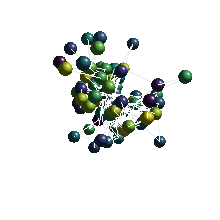

In [4]:

sio.getImg(0)

In [6]:
import igraph as ig
g = ig.read('../../../lesmiserables.gml')
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
n = g.vcount()
degree = g.degree()
degree = np.random.uniform(0, 1, n)
colors = cm.get_cmap('viridis', n)(degree)[:,0:3]

sio.updateNodeColors(colors)
colors
sio.renderMyImg( transparency=True)


{'state': 'success', 'asked to protagonist webclient': 'msg'}
recived img


In [45]:
import igraph as ig
n=1000
g = ig.Graph.Barabasi(n, 3)

sio.sendGraph(g)

{'state': 'success', 'msg': 'graph recived'}


In [36]:
from sznajd import get_evo_state

In [77]:
degrees = np.array([1/d for d in g.degree()], dtype=np.float32)
edges =  np.array([[e.source, e.target]for e in g.es], dtype=np.int32)
n = g.vcount()
n_edges = len(edges)
n_temps = 50
w = 0.1
state = np.random.choice(
    [0, 1],size= n,p=[.5, .5]).astype(dtype=np.int32)
colors = cm.get_cmap('viridis', n)(state.copy().astype("float"))[:,0:3]

sio.updateNodeColors(colors)
np.unique(colors[:,0])

array([0.267004, 0.993248])

In [78]:
import time
for i in range(1000):
    state = get_evo_state(degrees, edges, n,3,n_edges,state,n_temps,w)
    state = np.array(state, dtype=np.int32)
    colors = cm.get_cmap(
        'viridis', n)(state.astype("float"))[:,0:3]
    state = np.array(state, dtype=np.int32)
    sio.updateNodeColors(colors)
    time.sleep(0.01)

array([[0.267004, 0.004874, 0.329415],
       [0.267004, 0.004874, 0.329415],
       [0.267004, 0.004874, 0.329415],
       ...,
       [0.267004, 0.004874, 0.329415],
       [0.267004, 0.004874, 0.329415],
       [0.267004, 0.004874, 0.329415]])

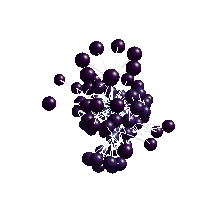

In [22]:
sio.getImg()

In [5]:
import igraph as ig
n=1000
g = ig.Graph.Barabasi(n, 3)


In [6]:
coords = g.layout_fruchterman_reingold_3d(niter = 100)

In [7]:
import igraph as ig
n=1000
g = ig.Graph.Barabasi(n, 3)

sio.sendGraph(g)

{'state': 'success', 'msg': 'graph recived'}


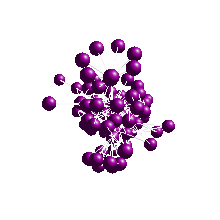

{'state': 'success', 'asked to protagonist webclient': 'msg'}
recived img


In [8]:
sio.renderMyImg( transparency=True)
sio.getImg()

In [9]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
n = g.vcount()
degree = g.degree()
colors = cm.get_cmap('viridis', n)(degree)[:,0:3]
colors[:,0:3].flatten()

array([0.283229, 0.120777, 0.440584, ..., 0.267004, 0.004874, 0.329415])

In [10]:

sio.updateNodeColors(colors)

In [11]:

colors

array([[0.283229, 0.120777, 0.440584],
       [0.281446, 0.08432 , 0.407414],
       [0.28291 , 0.105393, 0.426902],
       ...,
       [0.267004, 0.004874, 0.329415],
       [0.267004, 0.004874, 0.329415],
       [0.267004, 0.004874, 0.329415]])

In [ ]:

sio.renderMyImg( transparency=True)
sio.getImg()

In [10]:
import pickle
State = {}
g = pickle.load(open("../stdogvis/bin/graph.ml", "rb"))




